In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



In [2]:
#Filtering down columns
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
#Hazard Mitigation Grant Program Disaster Summaries - disasterNumber and obligatedTotalAmount

In [3]:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
disaster_sum = pd.read_csv('DisasterDeclarationsSummaries.csv')
disaster_sum_clean = disaster_sum[['disasterNumber', 'state', 'declarationType', 'fyDeclared', 'incidentType']]
disaster_sum_clean.head()

,disasterNumber,state,declarationType,fyDeclared,incidentType
0,1,GA,DR,1953,Tornado
1,4,MI,DR,1953,Tornado
2,3,LA,DR,1953,Flood
3,6,MI,DR,1953,Tornado
4,2,TX,DR,1953,Tornado


In [45]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014


In [44]:
disaster_projects = pd.merge(haz_project_clean, disaster_sum_clean, on='disasterNumber')
disaster_summary = disaster_projects.groupby(['state','incidentType', 'disasterNumber', 'projectIdentifier']).mean()
disaster_summary

numberOfProperties  \
state incidentType    disasterNumber projectIdentifier                       
AK    Coastal Storm   4244.0         DR-4244-0001-P                      0   
                                     DR-4244-0002-P                      0   
                                     DR-4244-0003-R                      0   
                                     DR-4244-0004-F                      0   
                                     DR-4244-0007-M                      0   
...                                                                    ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                      0   
                                     DR-4007-0009-R                      0   
                      4306.0         DR-4306-0003-M                      0   
                                     DR-4306-0004-R                      0   
      Tornado         1599.0         DR-1599-0001-P                      0   

                                                        numberOfFinalProperties  \
state incidentType    disasterNumber projectIdentifier                            
AK    Coastal Storm   4244.0         DR-4244-0001-P                           0   
                                     DR-4244-0002-P                           0   
                                     DR-4244-0003-R                           0   
                                     DR-4244-0004-F                           0   
                                     DR-4244-0007-M                           0   
...                                                                         ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                           0   
                                     DR-4007-0009-R                           0   
                      4306.0         DR-4306-0003-M                           0   
                                     DR-4306-0004-R                           0   
      Tornado         1599.0         DR-1599-0001-P                           0   

                                                        projectAmount  \
state incidentType    disasterNumber projectIdentifier                  
AK    Coastal Storm   4244.0         DR-4244-0001-P           22034.0   
                                     DR-4244-0002-P           25000.0   
                                     DR-4244-0003-R           74672.0   
                                     DR-4244-0004-F           15330.0   
                                     DR-4244-0007-M           28718.0   
...                                                               ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R         1217776.0   
                                     DR-4007-0009-R          151030.0   
                      4306.0         DR-4306-0003-M           17417.0   
                                     DR-4306-0004-R          127938.0   
      Tornado         1599.0         DR-1599-0001-P           22785.0   

                                                        federalShareObligated  \
state incidentType    disasterNumber projectIdentifier                          
AK    Coastal Storm   4244.0         DR-4244-0001-P                  16526.00   
                                     DR-4244-0002-P                  18750.00   
                                     DR-4244-0003-R                  56004.49   
                                     DR-4244-0004-F                  11498.00   
                                     DR-4244-0007-M                  28718.00   
...                                                                       ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                 608003.00   
                                     DR-4007-0009-R                 113273.00   
                      4306.0         DR-4306-0003-M                  17417.00   
                                     DR-4306-0004-R                  95953.50   
      Tornado         1599.0         DR

In [7]:
#Hazard Mitigation Grant Program Disaster Summaries
hazard_sum = pd.read_csv('HazardMitigationGrantProgramDisasterSummaries.csv')
hazard_sum_clean = hazard_sum[['disasterNumber', 'obligatedTotalAmount']]
hazard_sum_clean.head()

,disasterNumber,obligatedTotalAmount
0,1071,2834575.0
1,1337,782081.0
2,1326,333150.0
3,1506,1791043.0
4,1211,413384.0


In [17]:
disaster_sum_clean.head()
fire = disaster_sum_clean['incidentType']=='Fire'
disaster_sum_fire = disaster_sum_clean[fire]
disaster_sum_fire = disaster_sum_fire.drop_duplicates()
disaster_sum_fire

,disasterNumber,state,declarationType,fyDeclared,incidentType
6,11,NH,DR,1953,Fire
87,105,ID,DR,1960,Fire
122,65,CA,DR,1957,Fire
146,119,CA,DR,1962,Fire
934,231,ID,DR,1967,Fire
...,...,...,...,...,...
59183,5319,NV,FM,2020,Fire
59384,5320,WA,FM,2020,Fire
59385,5321,UT,FM,2020,Fire
59386,5322,NV,FM,2020,Fire


In [24]:
disaster_fire_state = disaster_sum_fire.groupby('state').count()
disaster_fire_state = disaster_fire_state['disasterNumber']
disaster_fire_state

state
AK     24
AL      9
AZ     66
CA    241
CO     68
FL     65
FM      1
GA     12
GU      1
HI     19
ID     19
KS     11
KY      8
LA      1
MA      4
ME      2
MH      1
MI      1
MN      9
MO      1
MT     54
NC      5
ND      1
NE      5
NH      2
NJ      3
NM     57
NV     69
NY      3
OK    105
OR     77
PR      1
SC      4
SD     24
TN     11
TX    250
UT     29
VA      8
WA    108
WI      1
WV      3
WY     20
Name: disasterNumber, dtype: int64

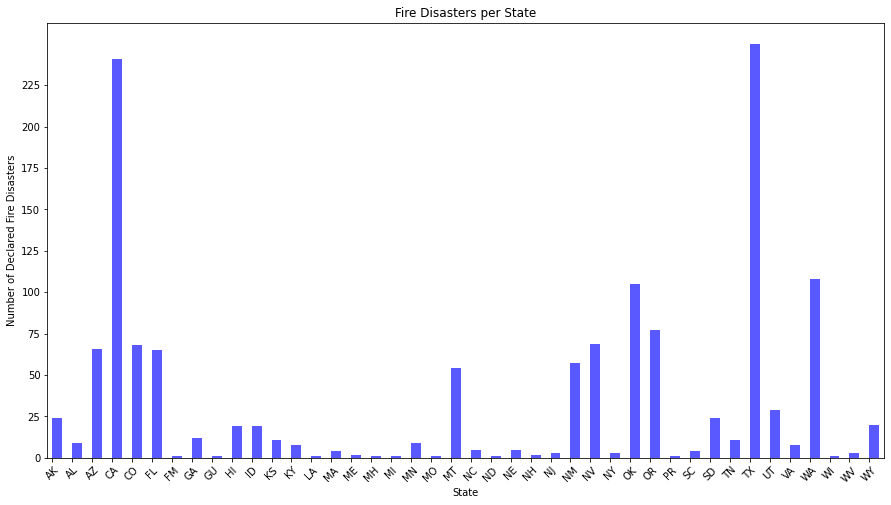

In [30]:
disaster_fire_state.plot(kind='bar', color='b', alpha=0.65, align="edge", figsize=(15,8), rot=45)
plt.xlabel("State")
plt.ylabel("Number of Declared Fire Disasters")
plt.title("Fire Disasters per State")
plt.xticks (rotation=45, ha='center')
plt.yticks(np.arange(0,250,25))
plt.show()

In [63]:
fire_state_sum = pd.merge(disaster_sum_fire, haz_project_clean, on='disasterNumber')
fire_money_state = fire_state_sum.groupby(['state']).sum()
fire_money_state = fire_money_state['federalShareObligated']
fire_money_state

state
AK    1.640594e+06
AZ    1.702756e+06
CA    2.204736e+08
CO    1.554259e+06
FL    3.061217e+06
GA    1.188774e+06
ID    1.738317e+05
KS    2.320395e+06
MT    2.619205e+06
NC    8.608475e+04
NM    1.892357e+06
NV    7.952010e+05
NY    2.632993e+08
OK    5.788966e+06
OR    1.975819e+06
SC    1.162542e+05
SD    8.833132e+05
TN    1.493043e+06
TX    2.796366e+07
UT    1.546650e+06
WA    1.183214e+07
WV    5.984370e+05
WY    9.447456e+05
Name: federalShareObligated, dtype: float64

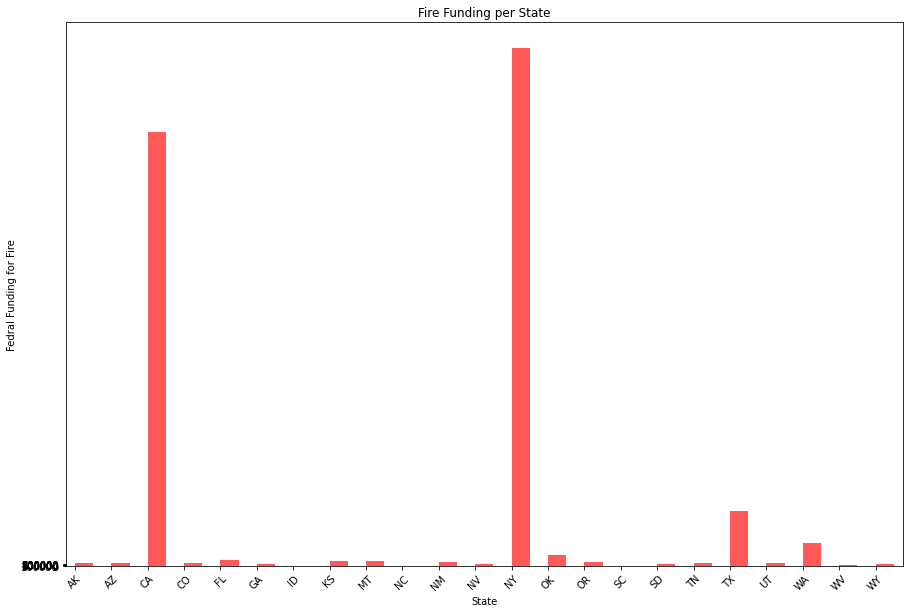

In [65]:
fire_money_state.plot(kind='bar', color='r', alpha=0.65, align="edge", figsize=(15,10), rot=45)
plt.xlabel("State")
plt.ylabel("Fedral Funding for Fire")
plt.title("Fire Funding per State")
plt.xticks (rotation=45, ha='center')
plt.yticks(np.arange(0,10e+5,1e+5))
plt.show()

In [46]:
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014
